Processing highdepth_methylbed - TSMA_Breast
Results exist at /Volumes/HNSD01/outdir/ecd_wgs_enriched_features/01_output/highdepth_methylbed_TSMA_Breast, skipping...
Processing highdepth_methylbed - Loyfer_atlas_Neuron
Results exist at /Volumes/HNSD01/outdir/ecd_wgs_enriched_features/01_output/highdepth_methylbed_Loyfer_atlas_Neuron, skipping...
Processing highdepth_methylbed - TSMA_Liver
Results exist at /Volumes/HNSD01/outdir/ecd_wgs_enriched_features/01_output/highdepth_methylbed_TSMA_Liver, skipping...
Processing highdepth_methylbed - Loyfer_atlas_Prostate-Ep
Results exist at /Volumes/HNSD01/outdir/ecd_wgs_enriched_features/01_output/highdepth_methylbed_Loyfer_atlas_Prostate-Ep, skipping...
Processing highdepth_methylbed - Loyfer_atlas_Lung-Ep-Alveo
Results exist at /Volumes/HNSD01/outdir/ecd_wgs_enriched_features/01_output/highdepth_methylbed_Loyfer_atlas_Lung-Ep-Alveo, skipping...
Processing highdepth_methylbed - Loyfer_atlas_Adipocytes
Results exist at /Volumes/HNSD01/outdir/ecd

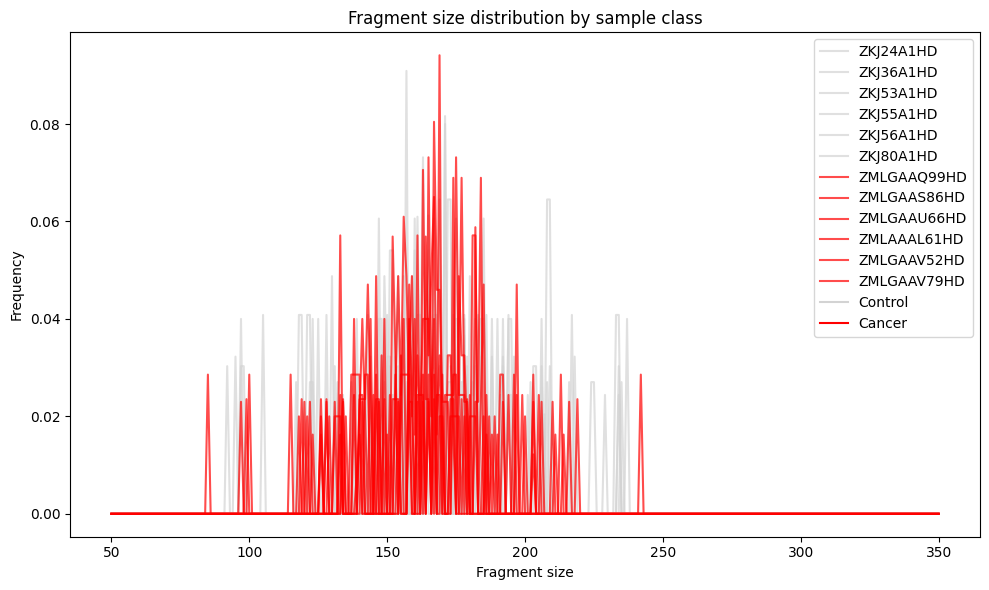

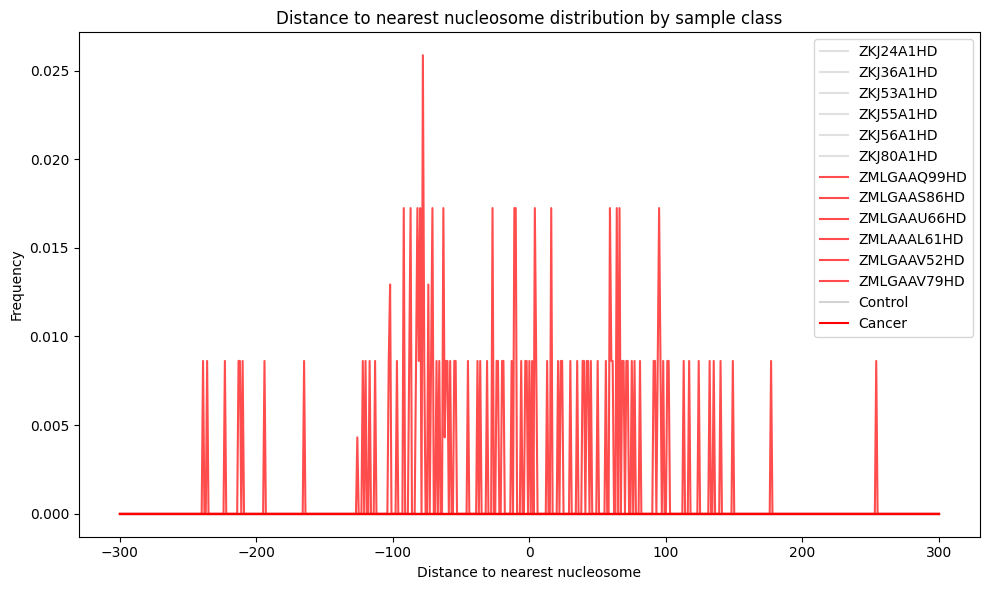

<Figure size 600x400 with 0 Axes>

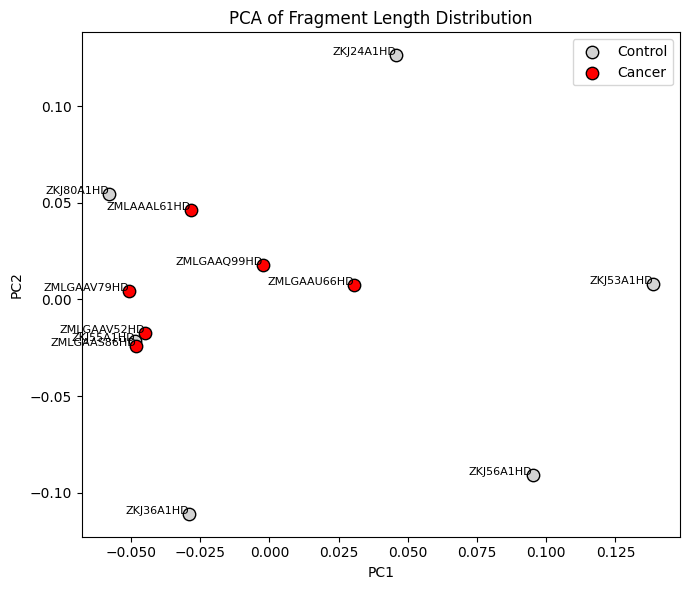

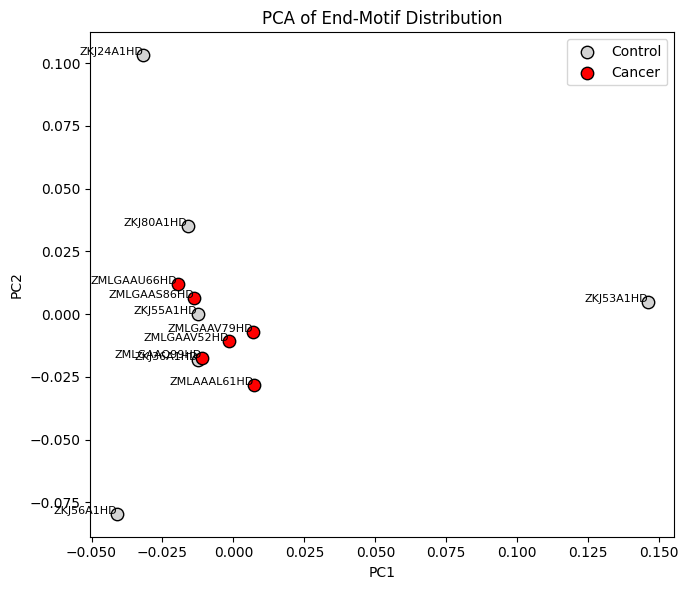

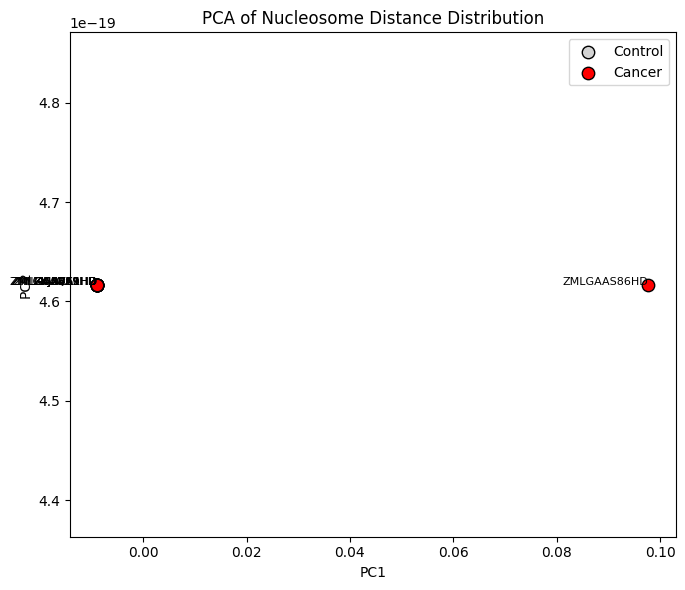

AssertionError: 
Arrays are not almost equal to 6 decimals
a and b vector must have the same sum
Mismatched elements: 1 / 1 (100%)
Max absolute difference: 1.
Max relative difference: 1.
 x: array(0.)
 y: array([1.])

In [5]:
# %%
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import pathlib 
import os 
import ot
from helper_functions import * 

warnings.filterwarnings("ignore")

from tqdm import tqdm

project = "ecd_wgs_enriched_features"
inputdir = f"/Volumes/HNSD01/storage/{project}"
outputdir = f"/Volumes/HNSD01/outdir/{project}"

path_to_01_output = os.path.join(outputdir, "01_output")
os.system(f"mkdir -p {path_to_01_output}")

all_input_files = [item for item in pathlib.Path(inputdir).glob(f"*/*/*/*/*_GWfeature_*.csv")]
metadata = pd.DataFrame(
    data = all_input_files, columns = ["path"]
)
metadata["SampleID"] = metadata["path"].apply(lambda x: x.name.split("_")[0].split("-")[1])
metadata["Enrich_strategy"] = metadata["path"].apply(lambda x: str(x).split("/")[-5])
metadata["Enrich_panel"] = metadata["path"].apply(lambda x: str(x).split("/")[-4])
metadata["feature_type"] = metadata["path"].apply(lambda x: x.name.split("_")[-1].replace(".csv", ""))
metadata["feature_dir"] = metadata["path"].apply(lambda x: str(x).split("/fragmentomics_features")[0])
mainsrc = "/Users/hieunguyen/src/ecd_wgs_enriched_features"
sample_metadata = pd.read_csv(os.path.join(mainsrc, "metadata.csv"))[["LABCODE", "Label"]]
metadata = metadata.merge(sample_metadata, right_on = "LABCODE", left_on = "SampleID")

for enrich_strategy in metadata.Enrich_strategy.unique().tolist():
    for enrich_panel in metadata[metadata.Enrich_strategy == enrich_strategy].Enrich_panel.unique().tolist():
        print(f"Processing {enrich_strategy} - {enrich_panel}")
        path_to_save_output = os.path.join(path_to_01_output, f"{enrich_strategy}_{enrich_panel}")
        os.system(f"mkdir -p {path_to_save_output}")
        if os.path.isfile(os.path.join(path_to_save_output, "status.txt")) == False:
            run_analysis(
                all_input_samples = metadata[(metadata.Enrich_panel == enrich_panel) & (metadata.Enrich_strategy == enrich_strategy)].feature_dir.unique().tolist(), 
                path_to_save_output = path_to_save_output)
        else:
            print(f"Results exist at {path_to_save_output}, skipping...")

In [6]:
path_to_save_output

'/Volumes/HNSD01/outdir/ecd_wgs_enriched_features/01_output/highdepth_atacseq_overlap_tss_41598_2022_14675_MOESM8_ESM.STAD_overlap_TSS_up_1000_down_1000_UCSC'